In [1]:
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [2]:
from vega_datasets import data
cars = data.cars()
cars.head(10)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


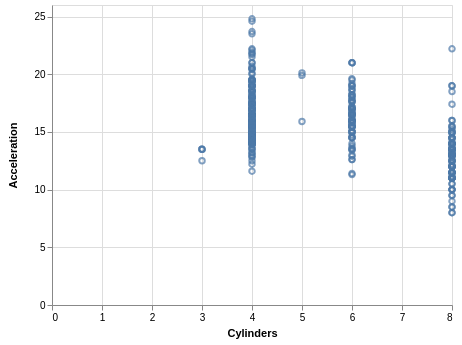

In [3]:
cars_accelrtn_cylinders = cars[['Acceleration' , 'Cylinders']]
alt.Chart(cars_accelrtn_cylinders).mark_point().encode(y='Acceleration:Q' , x='Cylinders:Q')

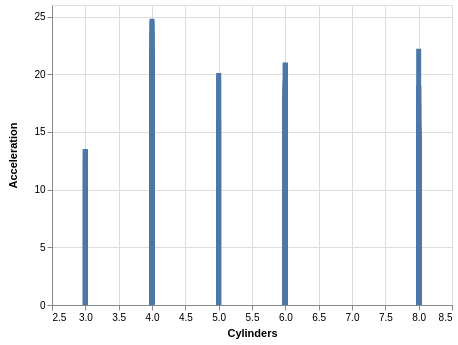

In [4]:
alt.Chart(cars_accelrtn_cylinders).mark_bar().encode(y='Acceleration:Q' , x='Cylinders:Q')

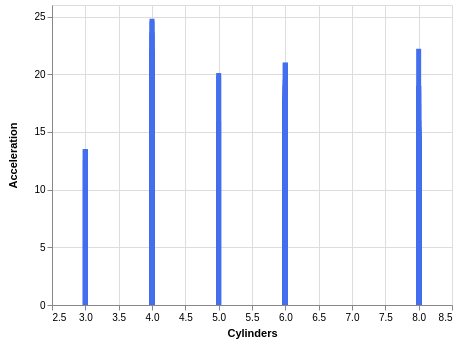

In [74]:
alt.Chart(cars_accelrtn_cylinders).mark_bar(color = "#436EEE").encode(y='Acceleration:Q' , x='Cylinders:Q').properties(
    width=400,
    height=300)


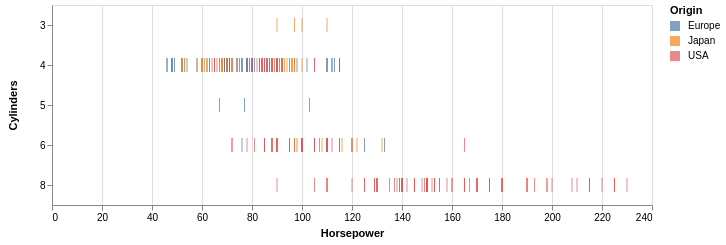

In [35]:
alt.Chart(cars).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O' , 
    color = 'Origin'
).properties( width=600,
    height=200)


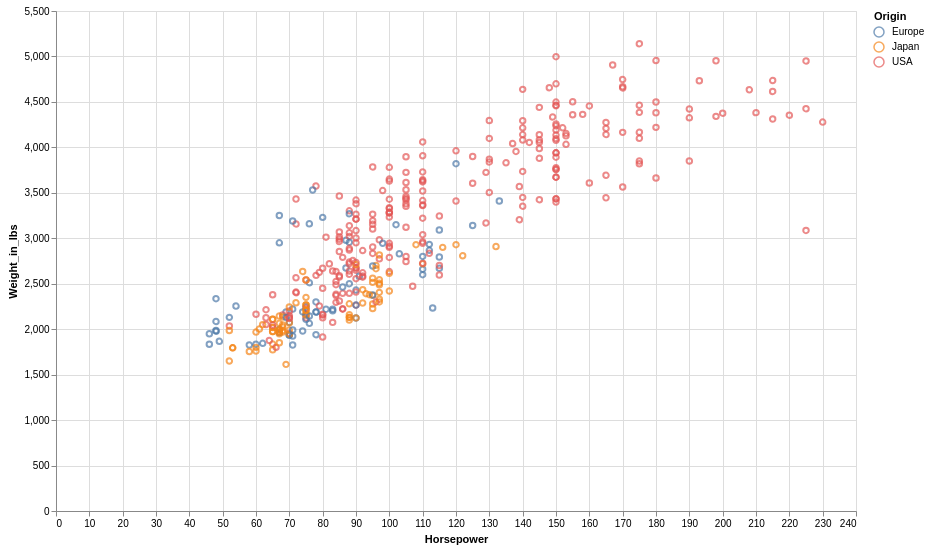

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Weight_in_lbs',
    color='Origin',
).properties(
    width=800,
    height=500)

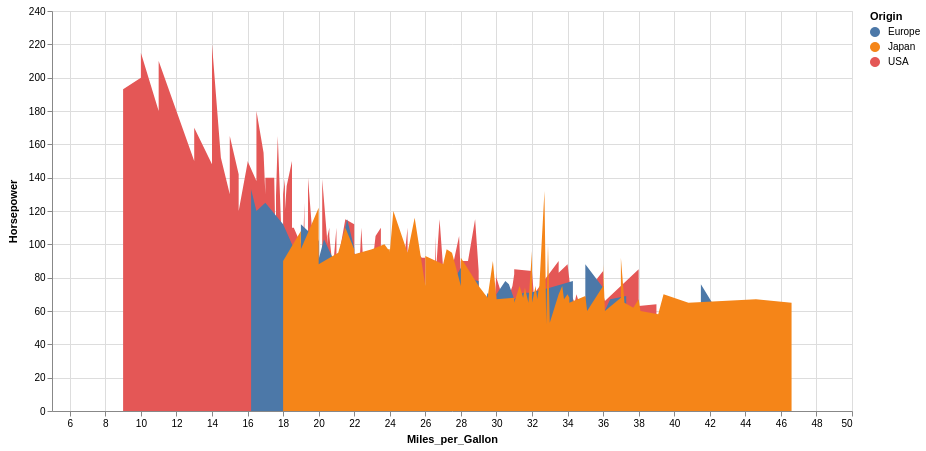

In [7]:
alt.Chart(cars).mark_area().encode(
    x="Miles_per_Gallon",
    y="Horsepower",
    color="Origin"
).properties(
    width=800,
    height=400)

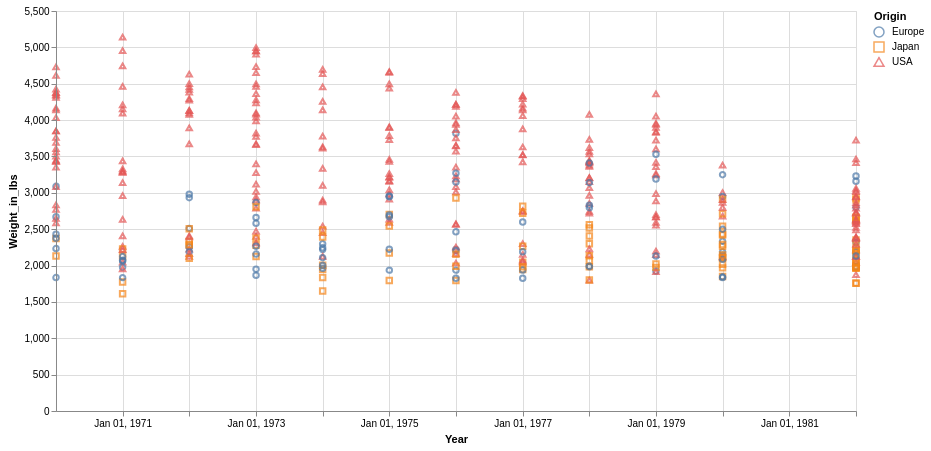

In [9]:
alt.Chart(cars).mark_point().encode(
    x="Year:T",
    y="Weight_in_lbs",
    color="Origin",
    shape = "Origin"
).properties(
    width=800,
    height=400)

# Data Transformations
---


It is often necessary to transform or filter data in the process of visualizing it. In Altair you can do this one of two ways:

- Before the chart definition, using standard Pandas data transformations.
- Within the chart definition, using Vega-Lite’s data transformation tools.

In most cases, we suggest that you use the first approach, because it is more straightforward to those who are familiar with data manipulation in Python, and because the Pandas package offers much more flexibility than Vega-Lite in available data manipulations.

The second approach becomes useful when the data source is not a dataframe, but, for example, a URL pointer to a JSON or CSV file. It can also be useful in a compound chart where different views of the dataset require different transformations.

This second approach – specifying data transformations within the chart specification itself – can be accomplished using the transform_* methods of top-level objects:

## Aggregate Transforms

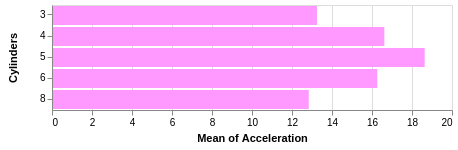

In [40]:
alt.Chart(cars).mark_bar(color='#FF99FF').encode(
    y='Cylinders:O',
    x='mean(Acceleration):Q',
)

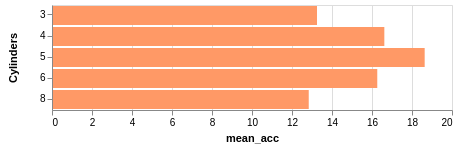

In [44]:
alt.Chart(cars).mark_bar(color = '#FF9966').encode(
    y='Cylinders:O',
    x='mean_acc:Q'
).transform_aggregate(
    mean_acc='mean(Acceleration)',
    groupby=["Cylinders"]
)

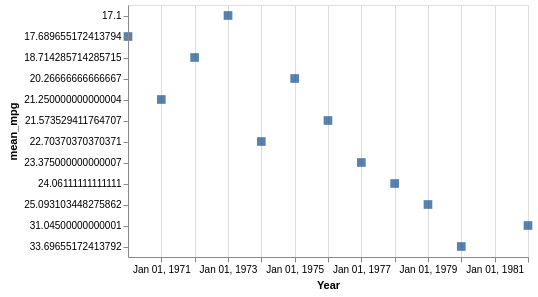

In [60]:
alt.Chart(cars).mark_square(color = '#104E8B' , size = 75).encode(
    y='mean_mpg:O',
    x='Year:T'
).transform_aggregate(
    mean_mpg='mean(Miles_per_Gallon)',
    groupby=["Year"]
)

# Bin transforms

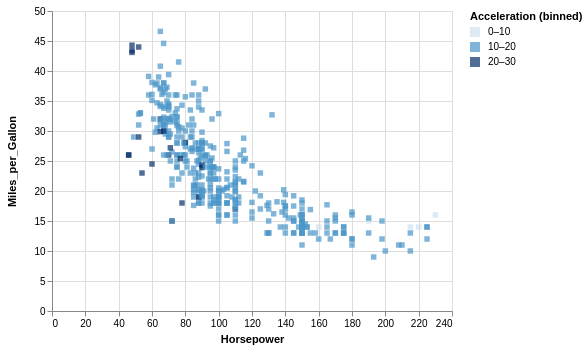

In [72]:
alt.Chart(cars).mark_square(color = "#1E90FF").encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=3))
)

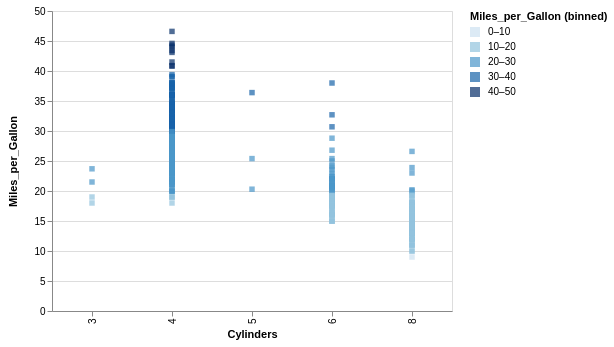

In [71]:
alt.Chart(cars).mark_square().encode(
    x='Cylinders:O',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Miles_per_Gallon:Q', bin=alt.Bin(maxbins=5))
).properties(
    width=400,
    height=300)